In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet

In [3]:
link = 'https://pkgstore.datahub.io/core/co2-ppm-daily/co2-ppm-daily_csv/data/f2f91444294eec9f764430483fafc6be/co2-ppm-daily_csv.csv'
df=pd.read_csv(link)
df['date'] = pd.to_datetime(df['date'])
df.columns=['ds', 'y']
df.head()

,ds,y
0,1958-03-30,316.16
1,1958-03-31,316.40
2,1958-04-02,317.67
3,1958-04-03,317.76
4,1958-04-04,317.09


In [4]:
model=Prophet()
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
future = model.make_future_dataframe(periods=365*10)
forecast = model.predict(future)

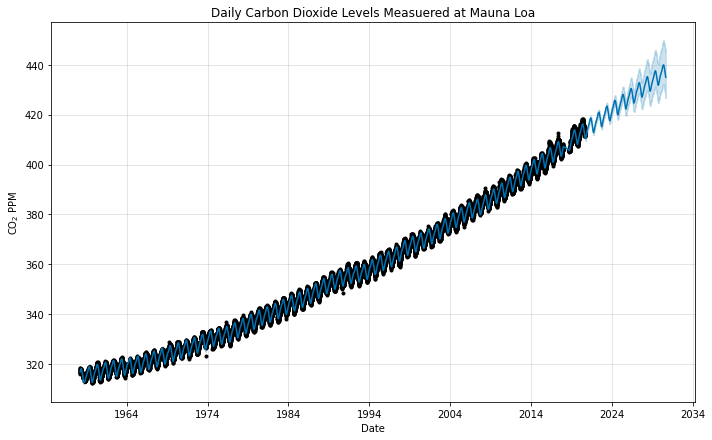

In [6]:
fig = model.plot(forecast, xlabel='Date',
                ylabel=r'CO$_2$ PPM')
plt.title('Daily Carbon Dioxide Levels Measuered at Mauna Loa')
plt.show()

In [7]:
forecast.head(3).T

,0,1,2
ds,1958-03-30 00:00:00,1958-03-31 00:00:00,1958-04-02 00:00:00
trend,314.886,314.889,314.894
yhat_lower,316.034,316.07,316.134
yhat_upper,317.721,317.812,317.847
trend_lower,314.886,314.889,314.894
trend_upper,314.886,314.889,314.894
additive_terms,1.99996,2.03278,2.13417
additive_terms_lower,1.99996,2.03278,2.13417
additive_terms_upper,1.99996,2.03278,2.13417
weekly,0.00316664,-0.00857108,0.00335867


In [15]:
df=pd.read_csv('data/AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [17]:
df['Month']=pd.to_datetime(df['Month'])
df.columns=['ds', 'y']
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


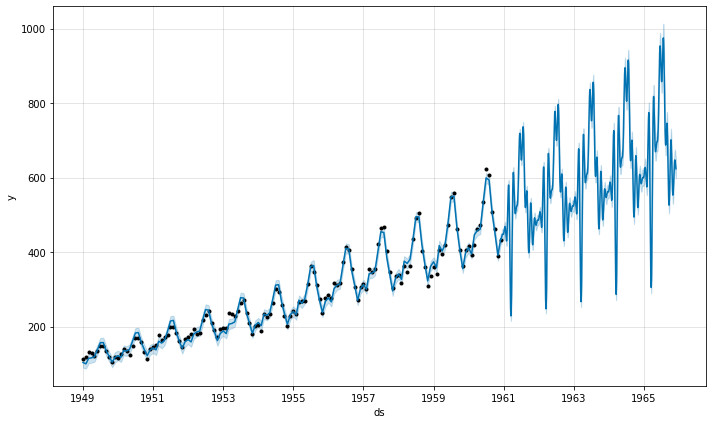

In [18]:
model = Prophet(seasonality_mode='multiplicative')
model.fit(df)
future = model.make_future_dataframe(periods=365*5)
forecast = model.predict(future)
fig = model.plot(forecast)
plt.show()